In [1]:
import numpy
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = keras.utils.image_dataset_from_directory(
    'data/train/',
    color_mode='rgb',
    image_size=(64, 64)
)
valset = keras.utils.image_dataset_from_directory(
    'data/val/',
    color_mode='rgb',
    image_size=(64, 64)
)
testset = keras.utils.image_dataset_from_directory(
    'data/test/',
    color_mode='rgb',
    image_size=(64, 64)
)

Found 47163 files belonging to 6 classes.
Found 5895 files belonging to 6 classes.
Found 5896 files belonging to 6 classes.


In [3]:
print(dataset.class_names)
print(valset.class_names)
print(testset.class_names)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


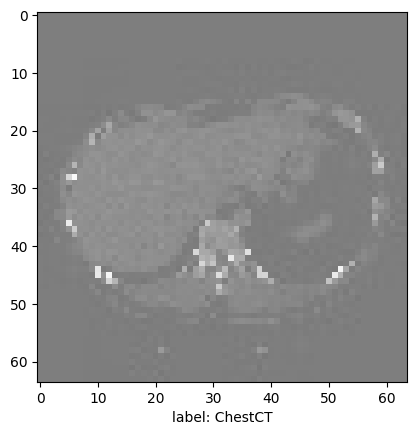

In [4]:
for imgs, labels in dataset.take(1):
    for i in range(len(imgs)):
        img = imgs[i]
        label = labels[i]
        plt.xlabel(f"label: {dataset.class_names[label]}")
        plt.imshow(img/255)
        plt.show()
        break

In [5]:
def build_model():
    model = keras.Sequential(name='Medical')
    model.add(keras.Input(shape=(64, 64, 3)))
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(6, activation='softmax'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

In [6]:
model = build_model()
model.summary()

Model: "Medical"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0   

In [7]:
history = model.fit(dataset, validation_data=valset, epochs=10)

Epoch 1/10


I0000 00:00:1708420849.614058  204613 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1474/1474 [==============================] - 12s 6ms/step - loss: 1.0487 - accuracy: 0.5616 - val_loss: 0.3505 - val_accuracy: 0.9732
Epoch 2/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.2380 - accuracy: 0.9803 - val_loss: 0.1314 - val_accuracy: 0.9942
Epoch 3/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.1124 - accuracy: 0.9894 - val_loss: 0.0804 - val_accuracy: 0.9939
Epoch 4/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.0760 - accuracy: 0.9908 - val_loss: 0.0736 - val_accuracy: 0.9898
Epoch 5/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.0524 - accuracy: 0.9928 - val_loss: 0.0360 - val_accuracy: 0.9949
Epoch 6/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.0456 - accuracy: 0.9924 - val_loss: 0.0425 - val_accuracy: 0.9925
Epoch 7/10
1474/1474 [==============================] - 8s 5ms/step - loss: 0.0405 - accuracy: 0.9939 - val_loss: 0.0306 - val_accuracy: 0.9953
Ep

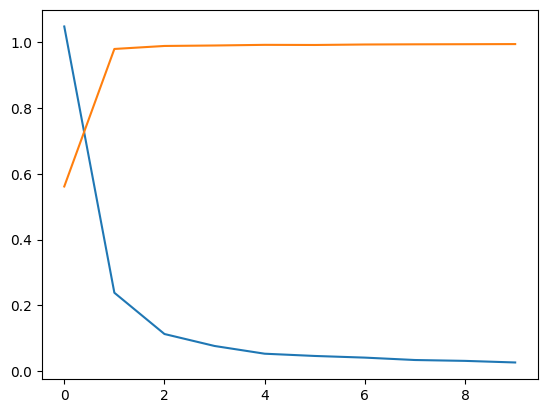

In [8]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.show()

In [9]:
loss, accuracy = model.evaluate(testset)
print(f"loss: {loss:.3f}, accuracy: {accuracy:.3f}")

185/185 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9886
loss: 0.091, accuracy: 0.989
